<a href="https://colab.research.google.com/github/Arbues/PAM_proyect/blob/main/Copia_de_Multonomia_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Logistic Regresion
Impresion de las librerias nesesarias:
+ numpy: Se utiliza para realizar cálculos numéricos, manipular datos de manera eficiente a traves de las matrcies y generar numeros aleatorios.
+ matplotlib.pyplot: sublibreria que nos permitira crear graficos para representar a los numeros que estan en forma de matrix 8x8 a escala de grises
+ seaborn: biblioteca de visualizacion de datos mas avanzada, en nuestro caso solo lo usaremos para la matrix de confusion
+ pandas:biblioteca que proporciona estructuras de datos y herramientas para el análisis de datos, lo usaremos cuando se trata de cargar datos, realizar análisis exploratorio de datos y mostrar resultados en un formato tabular.
+ train_test_split de sklearn.model_selection: biblioteca para Machine Learning y el metodo a importar sirve para dividir un conjunto de datos en conjuntos de entrenamiento y prueba
+ LogisticRegression de sklearn.linear_model: importamos la implementación de la regresión logística para construir un modelo.
+ metrics de sklearn: métricas y herramientas para evaluar el rendimiento de los modelos de MachineLearning
+ importamos el conjunto de datos "digits", que contiene imágenes de dígitos escritos a mano.


In [ ]:
# %% Modulos y datos

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Datos2
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


## Análisis Exploratorio de Datos (EDA)
#### ¿Que tipo de variable es mnist? y ¿Cuales son sus atributos y metodos?
Los atributos aparecen de la forma "\_\_name__" son metodos magicos y "metodo" son los metods.

In [ ]:
print("tipo: " + str(type(mnist)))

Un objeto "Bunch" es una estructura que contiene varios elementos relacionados, como datos y metadatos, organizados en un solo objeto.

In [ ]:
print("atributos y métodos: " + str(dir(mnist)))

Nosotros vamos a enfocarnos en la data donde esta todas las observaciones recopiladas y en los targets que seran las etiquetas que representa a cada observacion de la data.
Para mas informacion se puede obtener en el string DESCR (description) o en el url

#### Analizando el atributo data:






In [ ]:
print("tipo de datos: ", str(type(mnist.data)))
print("Forma de los datos (data):", mnist.data.shape)



tipo de datos:  <class 'pandas.core.frame.DataFrame'>
Forma de los datos (data): (70000, 784)


Observamos que la observaciones estan en un objeto DataFrame proporcionado por pandas en el que cada observacion esta expresada en un vector y hay 70000 observaciones.

###### Visualizacion de uno de ellos:

especificar xq .to_numpy

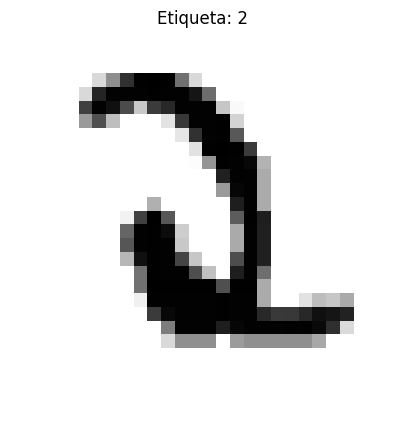

In [ ]:
observacion2 = 400
# 1) para acceder a una fila de un dataframe usamos su metodo iloc
# 2) procedemos a convertirlo a una matrix numpy (ya que pyplot recibe objetos numpy)
# 3) finalmente pasamos de vector a matrix con reshape
imagen = mnist.data.iloc[observacion2].to_numpy().reshape(28, 28)
plt.figure(figsize=(5,5))  # Tamaño de la figura
plt.imshow(imagen, cmap='binary')  # Colormap en escala de grises siendo el 0 el color blanco
plt.title(f'Etiqueta: {mnist.target[observacion2]}')  # Etiqueta correspondiente al dígito
plt.axis('off')  # Deshabilita los ejes
plt.show() #muestra la imagen

#### Analizando el atributo target
Sabemos por el nombre que es el array de una columna de etiquetas representando cada numero ingresado a mano, por lo que generamos un **grafico de barras** que muestra cuántas veces aparece cada etiqueta en el conjunto de datos digits para comprender la distribucion de las etiquetas.
En la segunda linea de codigo aplicamos los metodos de un DataFrame:
+ value_counts(): para contar las repeticiones de cada valor en el array
+ sort_index(): se ordena de acuerdo a las etiquetas (del 1 al 10)
+ plor(kind="bar"): se genera un grafico de barras de cada etiqueta en el eje X y el numero de repeticiones de esta en el eje Y.

tipo: <class 'pandas.core.series.Series'>


<Axes: >

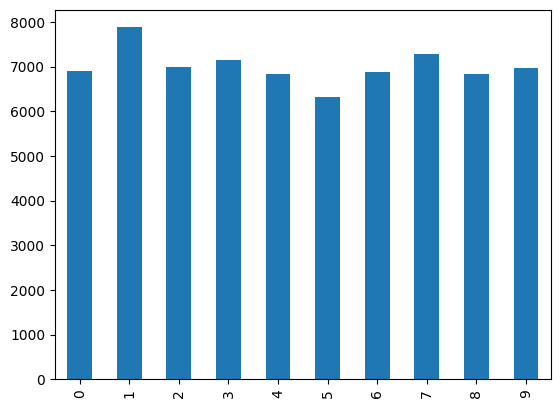

In [ ]:
print("tipo: " + str(type(mnist.target)))

mnist.target.value_counts().sort_index().plot(kind = "bar")

## Construccion del modelo
Comparacion con las redes neuronales:
+ el input layer tiene 64 neuronas
+ el output layer tiene 10 neuronas


#### Particionamiento de datos
 Usaremos el metodo importado train_test_split:
+ mnist.data: Las características de las imágenes.
+ mnist.target: Las etiquetas de las imágenes (los dígitos que representan).
+ test_size=0.2: El 20% del conjunto de datos se usa como conjunto de prueba.
+ stratify=mnist.target: Se asegura que la distribución de etiquetas se mantenga en ambos conjuntos de entrenamiento y prueba
y devuelve el "X" de entrenamiento/testeo (en DataFrames), el "Y" de entrenamiento/testeo (en Series).

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.2,stratify = mnist.target)



Ahora veremos cual es el rango de cada pixel representado a numero para luego normalizarlo (esto se hace con el objetivo de reducir operaciones de gran escala) en caso sea nesesario.

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Convertir los DataFrames en Series con índices consistentes
X_train_series = X_train_df.max(axis=1)
X_train_series.index = range(len(X_train_series))  # Reiniciar índices
X_test_series = X_test_df.max(axis=1)
X_test_series.index = range(len(X_test_series))    # Reiniciar índices

# Crear una tabla de Pandas que contenga ambas Series al costado
max_values_df = pd.concat([X_train_series, X_test_series], axis=1)
max_values_df.columns = ['X_train_max', 'X_test_max']

# Imprimir la tabla
print(max_values_df)

       X_train_max  X_test_max
0            255.0       255.0
1            255.0       254.0
2            254.0       255.0
3            255.0       255.0
4            255.0       255.0
...            ...         ...
55995        255.0         NaN
55996        255.0         NaN
55997        255.0         NaN
55998        255.0         NaN
55999        255.0         NaN

[56000 rows x 2 columns]


Empezaremos con la Normalizacion:

In [ ]:
# a flotante para almacenar los valores entre 0 y 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Escala los valores de píxeles a un rango entre 0 y 1
X_train /= 255
X_test /= 255

#### Intanciamiento del modelo
+ multi_class = "multinomial": ya que el output tiene mas variables dependiente
+ max_iter = 5000: número máximo de iteraciones que el algoritmo de regresión logística multinomial realizará durante el proceso de entrenamiento antes de detenerse
+ verbose = 2: cantidad de informacion a dar en consola

In [ ]:
ModelBaseLog2 = LogisticRegression(multi_class = "multinomial",
                                  max_iter = 300,
                                  verbose = 2)

#### Ajuste

1. **Inicialización de Parámetros**: El método `fit` comienza con parámetros iniciales. Estos parámetros pueden inicializarse de manera aleatoria o utilizando algún valor predeterminado.

2. **Cálculo de Predicciones Iniciales**: Utiliza los parámetros iniciales junto con los datos de entrenamiento para realizar las primeras predicciones del modelo.

3. **Cálculo de Errores**: Compara las predicciones iniciales con las etiquetas reales. Para medir la discrepancia entre las predicciones y las etiquetas, se utiliza una métrica de error, que puede involucrar cálculos como la diferencia y la elevación al cuadrado.

4. **Actualización de Parámetros**: Para mejorar las predicciones, el modelo ajusta sus parámetros. Esto se logra mediante un algoritmo de optimización que modifica los parámetros en función de la magnitud del error y la dirección en la que se debe ajustar. Uno de los algoritmos comunes para esta tarea es el **descenso de gradiente**.

5. **Iteración**: Los pasos 2 a 4 se repiten varias veces. Durante cada iteración, se recalculan las predicciones, se evalúa el error y se actualizan los parámetros.

6. **Criterio de Detención**: El entrenamiento puede finalizar de dos maneras. Primero, si los parámetros convergen, lo que significa que dejan de cambiar significativamente y se ha alcanzado una solución cercana al óptimo. Segundo, si se llega a un número máximo de iteraciones predeterminado, en cuyo caso se detiene independientemente de si ha convergido o no.

7. **Resultado del Entrenamiento**: Al final del proceso, el modelo ha ajustado sus parámetros para hacer predicciones más precisas en función de los datos de entrenamiento.




In [ ]:
ModelBaseLog2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300, multi_class='multinomial', verbose=2)

## Pronostico
La elección y el análisis adecuado de las métricas de clasificaciónes son fundamentales para comprender y mejorar el rendimiento de los modelos, evitando problemas como el overfitting u underfitting y tomando decisiones basadas en datos reales en aplicaciones prácticas.


In [ ]:
# Calcular predicciones del modelo
y_train_pred = ModelBaseLog2.predict(X_train)
y_test_pred = ModelBaseLog2.predict(X_test)

# Métricas en el conjunto de entrenamiento
accuracy_train = accuracy_score(Y_train, y_train_pred)
precision_train = precision_score(Y_train, y_train_pred, average='weighted')
recall_train = recall_score(Y_train, y_train_pred, average='weighted')
f1_train = f1_score(Y_train, y_train_pred, average='weighted')

# Métricas en el conjunto de prueba
accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred, average='weighted')
recall_test = recall_score(Y_test, y_test_pred, average='weighted')
f1_test = f1_score(Y_test, y_test_pred, average='weighted')

# Imprimir métricas
print("Métricas en el conjunto de entrenamiento:")
print(f"Exactitud (Accuracy): {accuracy_train:.4f}")
print(f"Precisión (Precision): {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")

print("\nMétricas en el conjunto de prueba:")
print(f"Exactitud (Accuracy): {accuracy_test:.4f}")
print(f"Precisión (Precision): {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")


Métricas en el conjunto de entrenamiento:
Exactitud (Accuracy): 0.9394
Precisión (Precision): 0.9392
Recall: 0.9394
F1-Score: 0.9393

Métricas en el conjunto de prueba:
Exactitud (Accuracy): 0.9203
Precisión (Precision): 0.9200
Recall: 0.9203
F1-Score: 0.9201


Ahora analizaremos la **matrix de confusion**, donde las filas son los valores reales (osea las etiquetas previas) y las colunas son los valores predecidos por el modelo

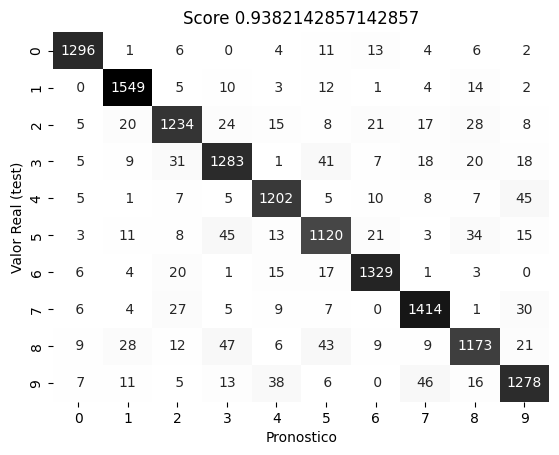

In [ ]:
Forecast = ModelBaseLog2.predict(X_test)

# Calculo de la matriz de confusion
metrics.confusion_matrix(Y_test ,Forecast)#filas valor real columnas valor predecido

# Generemos un grafico d esta matriz de confusion
# Usemos unu heat map de seaborn
sns.heatmap(metrics.confusion_matrix(Y_test ,Forecast),
            fmt = "2d",
            annot = True,
            cmap = "gray_r",
            cbar = False)
plt.xlabel("Pronostico")
plt.ylabel("Valor Real (test)")
plt.title("Score " + str(ModelBaseLog2.score(X_train,Y_train)))
plt.show()

## Analisis de errores


Este segmento se agrego para visualizar si mi modelo se confunde en cosas muy obvias para el ser humano o en cosas muy abstractas o mal dibujadas

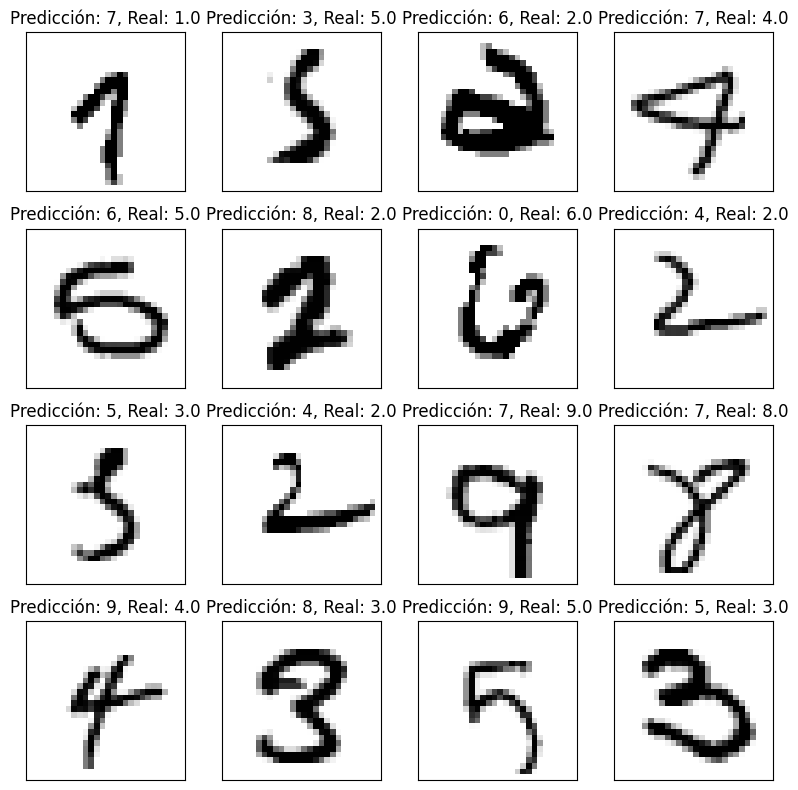

In [ ]:
# Realiza predicciones en el conjunto de prueba de MNIST
predicciones_mnist = ModelBaseLog2.predict(X_test)

# Encuentra los índices en los que el modelo se equivocó
indices_errores_mnist = np.where(predicciones_mnist != Y_test)[0]

# Muestra las imágenes de los dígitos en los que el modelo se equivocó
filas, columnas = 4, 4  # Puedes ajustar la cantidad de filas y columnas según tus preferencias
num_imagenes_a_mostrar = filas * columnas

fig, ax = plt.subplots(filas, columnas, figsize=(8, 8))
X_test2=X_test.values.astype(float)
Y_test2=Y_test.values.astype(float)
for i, axi in enumerate(ax.flat):
    if i < len(indices_errores_mnist) and i < num_imagenes_a_mostrar:
        idx = indices_errores_mnist[i]
        axi.imshow(X_test2[idx].reshape(28, 28), cmap="binary")
        axi.set(xticks=[])
        axi.set(yticks=[])
        axi.set_title(f"Predicción: {predicciones_mnist[idx]}, Real: {Y_test2[idx]}")

plt.tight_layout()
plt.show()